<a href="https://colab.research.google.com/github/satyakipal99/Coding-Samurai-Internship-Data-Science/blob/main/EDA_on_AirBnb_Listings_Coding_Samurai_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) on Airbnb Listings

Internship Project: Coding Samurai


Author: Satyaki Pal

### Importing Libraries

In [1]:
!pip install squarify

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium
import squarify
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
li = pd.read_csv('/content/drive/MyDrive/listings.csv')

### Listings Data Preprocessing

In [4]:
li.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
li.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
useless_columns = ['summary','thumbnail_url','medium_url','xl_picture_url','listing_url','host_thumbnail_url','host_picture_url','scrape_id','name','space','description',
                   'experiences_offered','neighborhood_overview','notes','transit','picture_url','host_url','host_about','street','neighbourhood_group_cleansed','zipcode',
                   'market','smart_location','country_code','is_location_exact','bed_type','square_feet','weekly_price','monthly_price','security_deposit','cleaning_fee',
                   'guests_included','extra_people','minimum_nights','maximum_nights','calendar_updated','requires_license','license','jurisdiction_names','cancellation_policy',
                   'require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count']

li.drop(columns=useless_columns, axis = 1, inplace = True)

We drop the columns we don't need and only keeping those which we are going to use for analysis.

In [7]:
li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3818 non-null   int64  
 1   last_scraped                 3818 non-null   object 
 2   host_id                      3818 non-null   int64  
 3   host_name                    3816 non-null   object 
 4   host_since                   3816 non-null   object 
 5   host_location                3810 non-null   object 
 6   host_response_time           3295 non-null   object 
 7   host_response_rate           3295 non-null   object 
 8   host_acceptance_rate         3045 non-null   object 
 9   host_is_superhost            3816 non-null   object 
 10  host_neighbourhood           3518 non-null   object 
 11  host_listings_count          3816 non-null   float64
 12  host_total_listings_count    3816 non-null   float64
 13  host_verifications

In [8]:
li.isnull().sum()

id                               0
last_scraped                     0
host_id                          0
host_name                        2
host_since                       2
host_location                    8
host_response_time             523
host_response_rate             523
host_acceptance_rate           773
host_is_superhost                2
host_neighbourhood             300
host_listings_count              2
host_total_listings_count        2
host_verifications               0
host_has_profile_pic             2
host_identity_verified           2
neighbourhood                  416
neighbourhood_cleansed           0
city                             0
state                            0
country                          0
latitude                         0
longitude                        0
property_type                    1
room_type                        0
accommodates                     0
bathrooms                       16
bedrooms                         6
beds                

In [9]:
li.dropna(axis=1, how='all', inplace=True)

In [10]:
li['last_scraped'] = pd.to_datetime(li['last_scraped'])
li['calendar_last_scraped'] = pd.to_datetime(li['calendar_last_scraped'])
li['price'] = li['price'].str.replace('[\$,]', '', regex=True).astype(float)

Removing the $ sign from the price column.

In [11]:
li.head()

,id,last_scraped,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,241032,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,...,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,4.07
1,953595,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,...,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.48
2,3308979,2016-01-04,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,...,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.15
3,7421966,2016-01-04,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
4,278830,2016-01-04,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,...,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,0.89


In [12]:
li['host_name'].fillna('Unknown', inplace=True)
li['host_location'].fillna('Unknown', inplace=True)
li['host_response_time'].fillna('Unknown', inplace=True)
# Continue this for other columns as needed

# Drop rows with missing values in a specific column
li.dropna(subset=['bedrooms'], inplace=True)

In [13]:
li.isnull().sum()

id                               0
last_scraped                     0
host_id                          0
host_name                        0
host_since                       2
host_location                    0
host_response_time               0
host_response_rate             523
host_acceptance_rate           773
host_is_superhost                2
host_neighbourhood             300
host_listings_count              2
host_total_listings_count        2
host_verifications               0
host_has_profile_pic             2
host_identity_verified           2
neighbourhood                  416
neighbourhood_cleansed           0
city                             0
state                            0
country                          0
latitude                         0
longitude                        0
property_type                    1
room_type                        0
accommodates                     0
bathrooms                       16
bedrooms                         0
beds                

In [14]:
li.drop_duplicates(inplace=True)

In [15]:
li.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 0 to 3817
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3812 non-null   int64         
 1   last_scraped                 3812 non-null   datetime64[ns]
 2   host_id                      3812 non-null   int64         
 3   host_name                    3812 non-null   object        
 4   host_since                   3810 non-null   object        
 5   host_location                3812 non-null   object        
 6   host_response_time           3812 non-null   object        
 7   host_response_rate           3289 non-null   object        
 8   host_acceptance_rate         3039 non-null   object        
 9   host_is_superhost            3810 non-null   object        
 10  host_neighbourhood           3512 non-null   object        
 11  host_listings_count          3810 non-null 

### Basic Statistics & visualization

In [16]:
# Calculate the average price of listings
average_price = li['price'].mean()
average_price

127.99895068205666

In [17]:
avg_price_per_room_type = li.groupby('room_type')['price'].mean().to_frame()
avg_price_per_room_type['std_price'] = li.groupby('room_type')['price'].std()
avg_price_per_room_type['room_type'] = avg_price_per_room_type.index
avg_price_per_room_type.index = np.arange(avg_price_per_room_type.shape[0])
avg_price_per_room_type

,price,std_price,room_type
0,155.943590,96.620983,Entire home/apt
1,75.044828,34.603905,Private room
2,47.547009,19.372704,Shared room


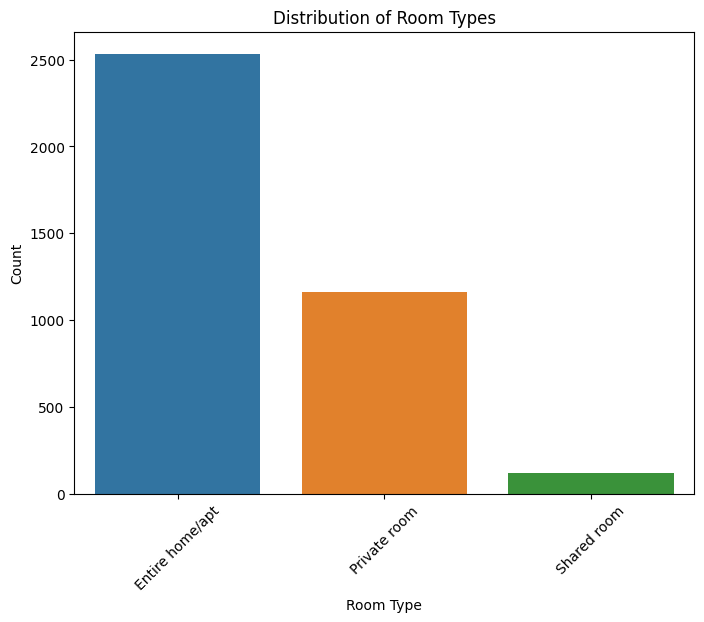

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=li, x='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

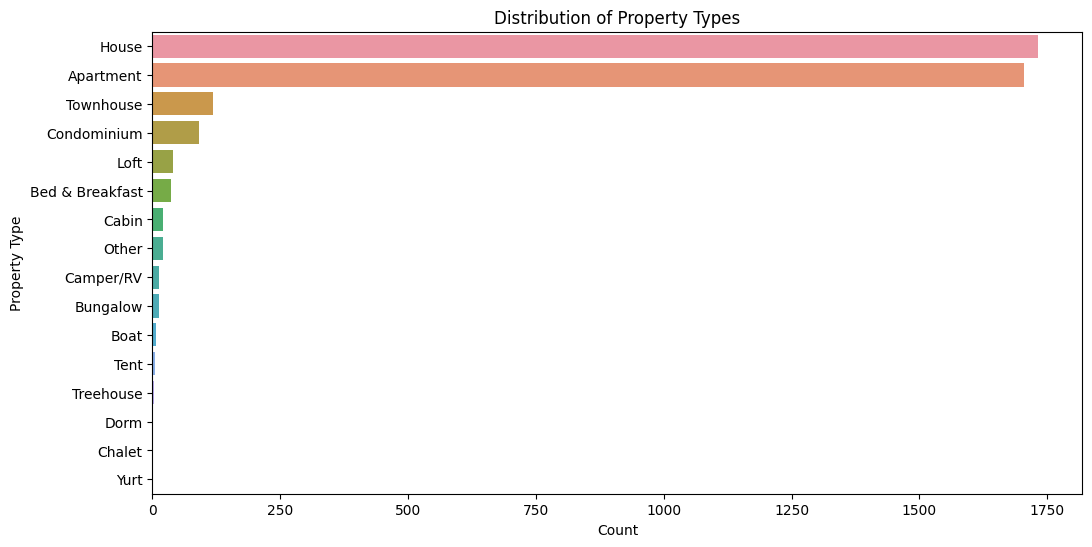

In [19]:
# Plot the distribution of property types
plt.figure(figsize=(12, 6))
sns.countplot(data=li, y='property_type', order=li['property_type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

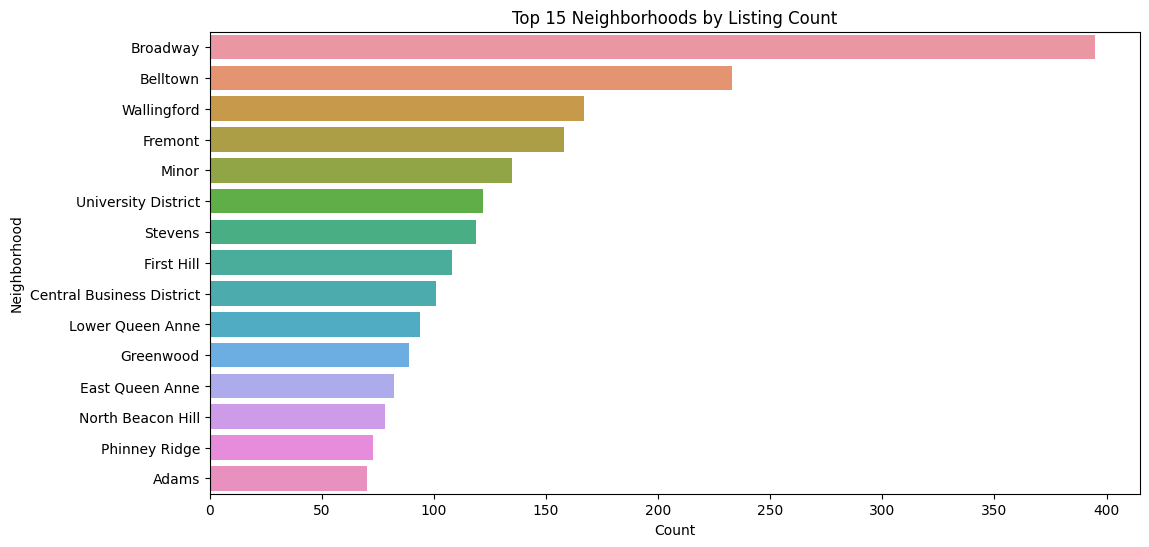

In [20]:
# Plot the distribution of neighborhoods
plt.figure(figsize=(12, 6))
sns.countplot(data=li, y='neighbourhood_cleansed', order=li['neighbourhood_cleansed'].value_counts().index[:15])
plt.title('Top 15 Neighborhoods by Listing Count')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

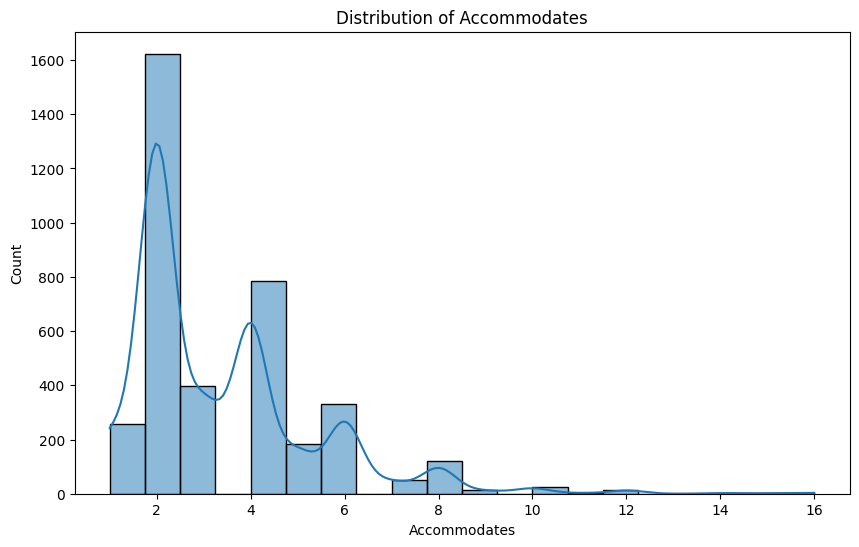

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(li['accommodates'], bins=20, kde=True)
plt.title('Distribution of Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Count')
plt.show()

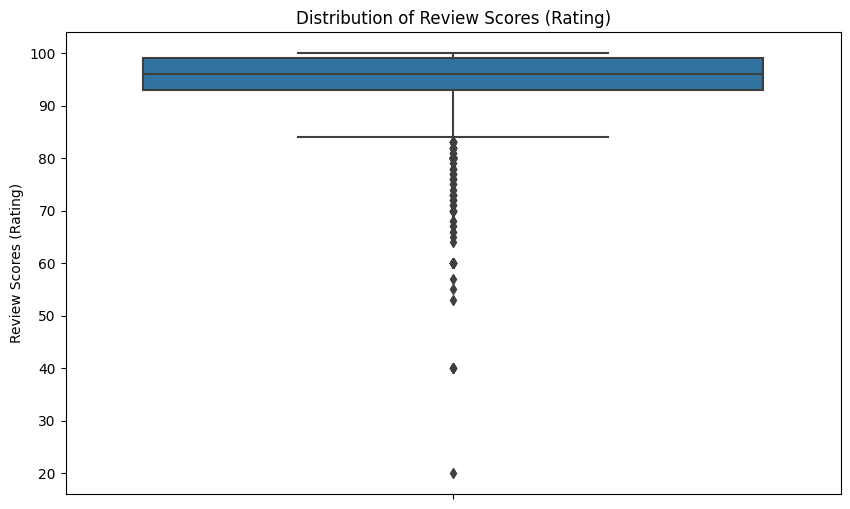

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=li, y='review_scores_rating')
plt.title('Distribution of Review Scores (Rating)')
plt.ylabel('Review Scores (Rating)')
plt.show()

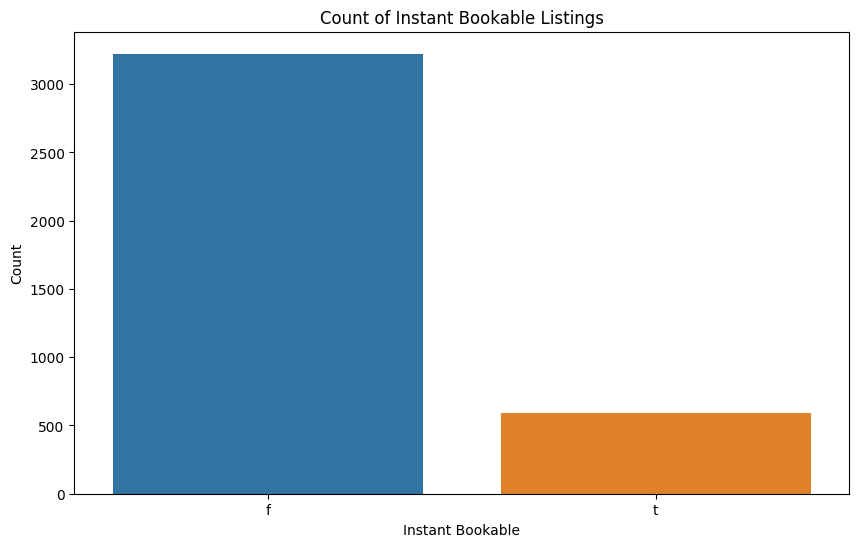

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=li, x='instant_bookable')
plt.title('Count of Instant Bookable Listings')
plt.xlabel('Instant Bookable')
plt.ylabel('Count')
plt.show()

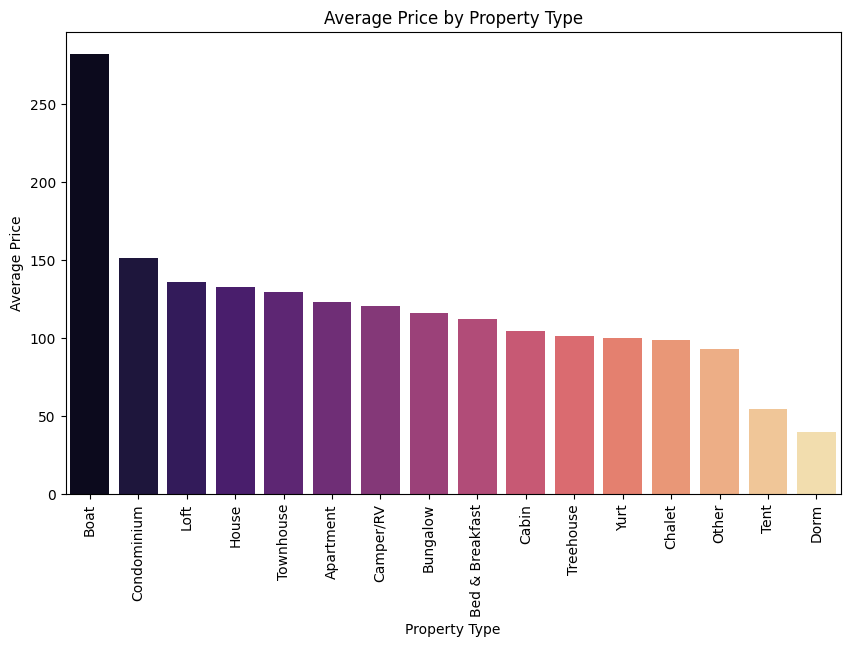

In [24]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Calculate the average price by property type
avg_price_by_property = li.groupby('property_type')['price'].mean().sort_values(ascending=False)

# Create a bar plot for average price by property type
sns.barplot(x=avg_price_by_property.index, y=avg_price_by_property.values, palette='magma')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.title('Average Price by Property Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

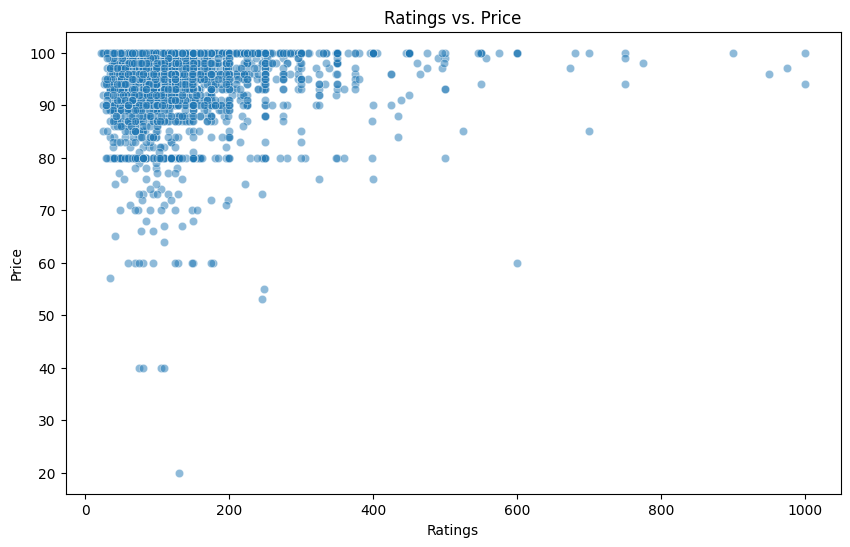

In [25]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot of number of reviews vs. price
sns.scatterplot(data=li, x='price', y='review_scores_rating', alpha=0.5)
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.title('Ratings vs. Price')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

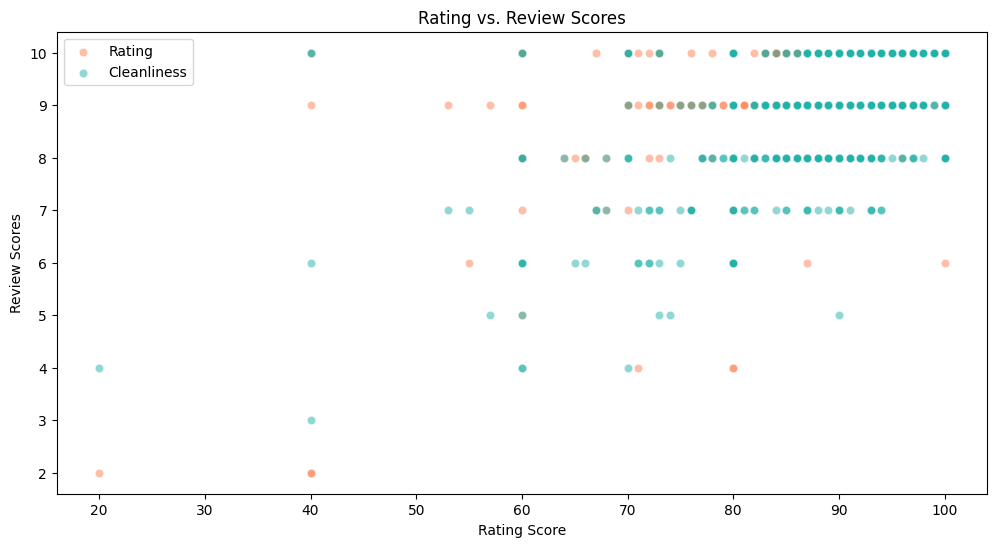

In [26]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create scatter plots for number of reviews vs. review scores
sns.scatterplot(data=li, x='review_scores_rating', y='review_scores_communication', alpha=0.5, color='coral', label='Rating')
sns.scatterplot(data=li, x='review_scores_rating', y='review_scores_cleanliness', alpha=0.5, color='lightseagreen', label='Cleanliness')
plt.xlabel('Rating Score')
plt.ylabel('Review Scores')
plt.title('Rating vs. Review Scores')
plt.legend()
plt

### Correlation Analysis

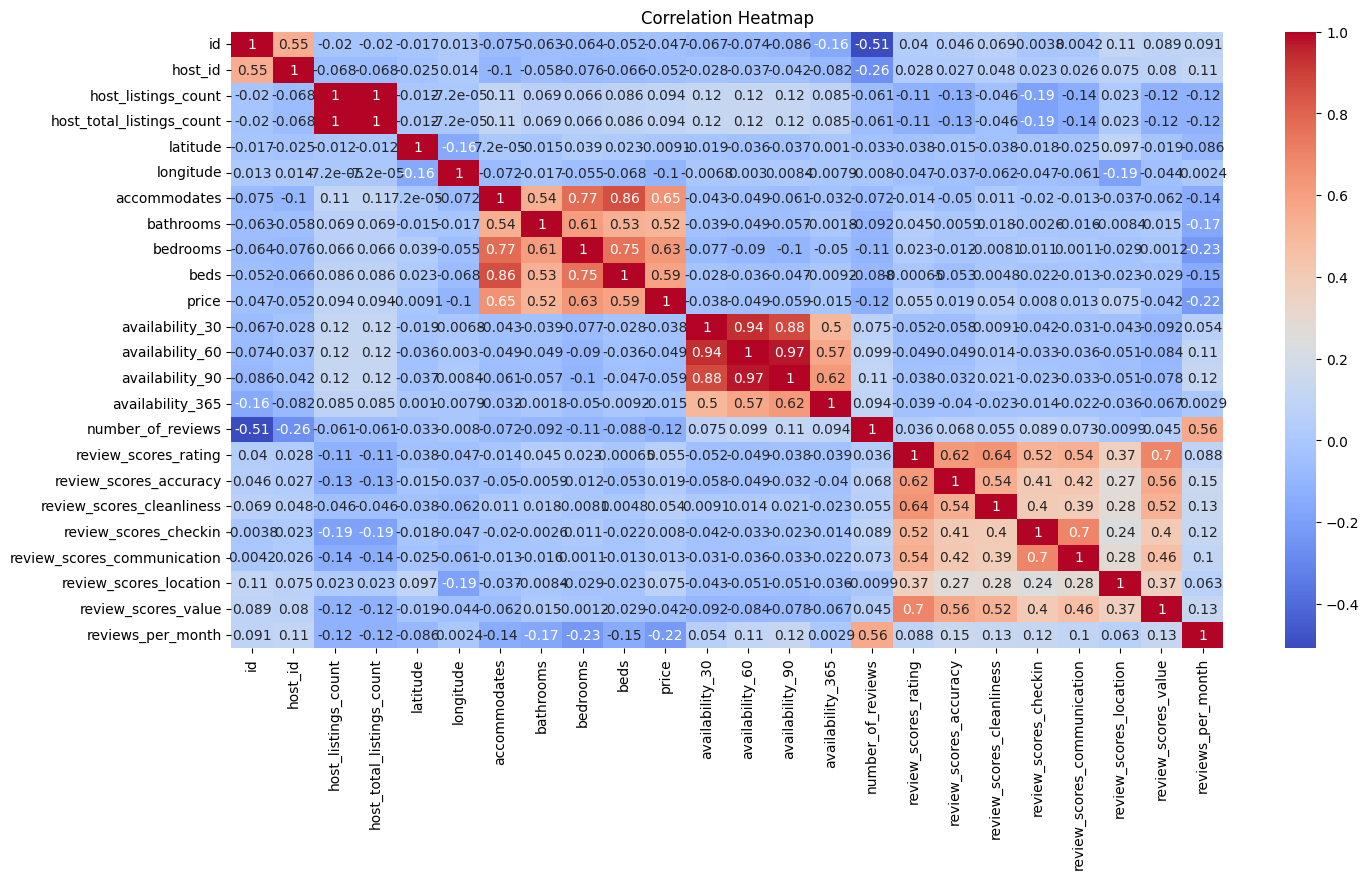

In [27]:
# Select only numeric columns for correlation analysis
numeric_data = li.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
print(numeric_data.corr())

                                   id   host_id  host_listings_count  \
id                           1.000000  0.545534            -0.020368   
host_id                      0.545534  1.000000            -0.067898   
host_listings_count         -0.020368 -0.067898             1.000000   
host_total_listings_count   -0.020368 -0.067898             1.000000   
latitude                    -0.017480 -0.025087            -0.011861   
longitude                    0.012667  0.014414            -0.000072   
accommodates                -0.074730 -0.100031             0.110297   
bathrooms                   -0.062958 -0.057864             0.069456   
bedrooms                    -0.064113 -0.075722             0.065931   
beds                        -0.051811 -0.066095             0.085970   
price                       -0.046633 -0.051637             0.093750   
availability_30             -0.066506 -0.028460             0.118186   
availability_60             -0.074180 -0.036531             0.12

### Geospatial Analysis

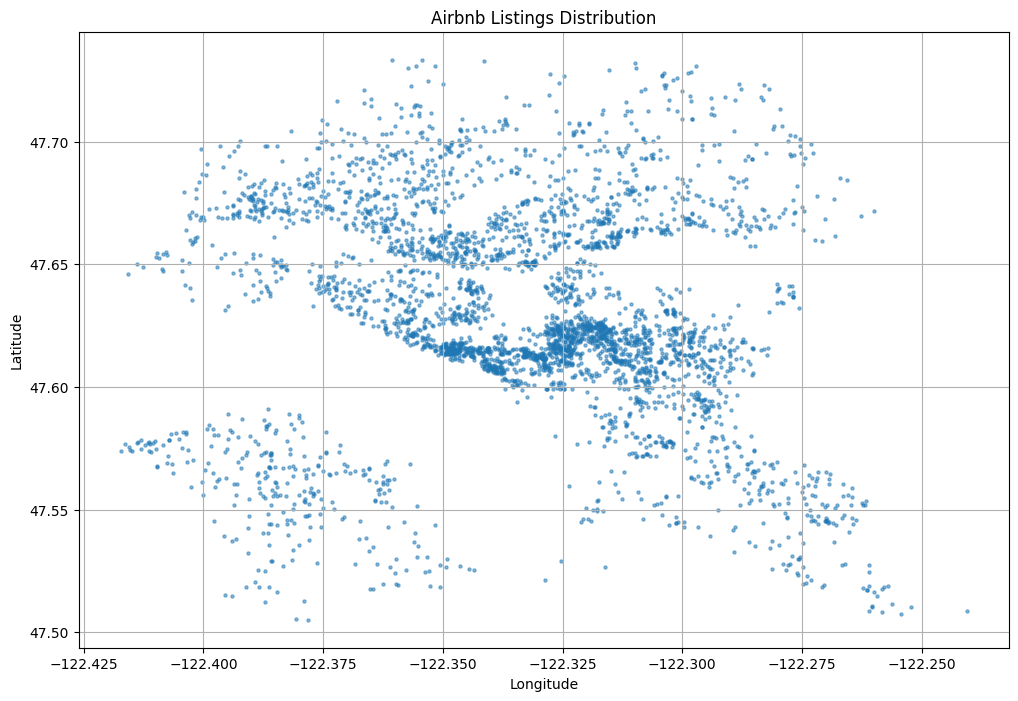

In [29]:
# Create a scatter plot of Airbnb listings using latitude and longitude
plt.figure(figsize=(12, 8))
plt.scatter(li['longitude'], li['latitude'], s=5, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb Listings Distribution')
plt.grid()
plt.show()

In [37]:
geometry = [Point(xy) for xy in zip(li['longitude'], li['latitude'])]
gdf = gpd.GeoDataFrame(li, geometry=geometry)
gdf.crs = 'EPSG:4326'

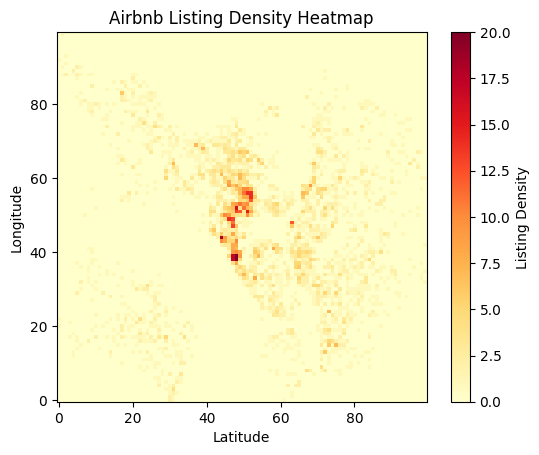

In [36]:
# Create a 2D histogram (heatmap) of the spatial data
heatmap, xedges, yedges = np.histogram2d(gdf['latitude'], gdf['longitude'], bins=100)

# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', cmap='YlOrRd')
plt.colorbar(label='Listing Density')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Airbnb Listing Density Heatmap')
plt.show()

## Documentation:

### **Data Cleaning and Preprocessing:**

Data cleaning and preprocessing are crucial initial steps in the exploratory data analysis (EDA) of Airbnb listings. This process involves addressing missing values, data type conversion, and the removal of duplicates to enhance data quality and suitability for analysis and modeling. Missing values were identified in various columns, including host-related information, and were either filled with relevant values or dropped, depending on the context. The 'price' column underwent a transformation to ensure compatibility with numerical analysis. Duplicate rows were removed to maintain data integrity. Additionally, a column with a significant number of missing values, 'neighbourhood,' was removed as it wouldn't contribute significantly to the analysis. These preprocessing steps are fundamental to ensuring the reliability of data and are a prerequisite for successful model development and insightful data analysis

### **Data Insights:**

In the process of visualizing the Airbnb listings data, several key insights were revealed:


* The average price for listings is approximately '128 dollar.', providing an initial understanding of the pricing landscape.
* 'House' and 'Apartment' are the most prevalent property type, with over 3,000 listings, indicating a strong presence in the dataset.
* 'Broadway' leads in the distribution of neighborhoods, followed by 'Belltown' highlighting their popularity among Airbnb hosts.
* Analyzing the distribution of accommodation capacity ('accommodates') and room types offers valuable insights into guest preferences and host offerings.
* The average price of 'Boat' type properties exceeds 250 dollars, making them the most expensive property type.

These visualizations provide valuable context for understanding the Airbnb listings dataset, including property types, neighborhood popularity, and pricing dynamics, which can inform further analyses and decision-making in the domain of short-term rentals.

### **Correlation Analysis**

The correlation matrix provides valuable insights into the relationships between various attributes in the dataset. One of the notable observations is the positive correlation between the number of reviews per month and the number of reviews, indicating that properties with more reviews tend to have a higher monthly review rate. Additionally, there's a significant negative correlation between the ratings and listing availability, suggesting that highly rated listings might have lesser availability, likely due to increased demand. On the other hand, attributes like longitude and latitude show weak correlations with most variables, highlighting their limited impact on the dataset's other features. These correlations can serve as a foundation for further analysis and modeling, offering insights into potential cause-and-effect relationships within the Airbnb listing dataset.

### **Geospatial Analysis**

Geospatial analysis is a valuable approach for understanding the distribution and density of Airbnb listings in London. These visualizations help users quickly identify popular areas with a high density of listings, making them ideal for potential visitors. They also offer insights for property owners and investors looking to make data-driven decisions about where to offer their listings. Geospatial analysis can be a crucial tool for understanding the Airbnb market and making informed choices related to property management and investment.